## Predicting the Popularity of a Movie based on IMDB, MovieLens and YouTube Data

### Data Preprocessing

#### The 'all csv' file contains IMDB&Youtube data. The IMDB file is from Kaggle competition, while the YouTube data is from web scraping. You can check the following sites to see how I combine these two dataset.
Kaggle IMDB competition: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
Youtube Web Scraping: 


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
%matplotlib inline

# 設定 data_path
dir_data = './'
f_all = os.path.join(dir_data, 'all.csv')
print('Path of read in data: %s' % (f_all))
data = pd.read_csv(f_all)
ratings = pd.read_csv(os.path.join(dir_data, 'ratings.csv'))

Path of read in data: ./all.csv


,Unnamed: 0,movieId,imdbId,tmdbId,youtubeId,title,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,year,full_link,views,dates,likes,dislikes
0,2560,49910,463998,1646.0,MT0L1U-Rdj4,Freedom Writers (2007),Color,Richard LaGravenese,84.0,123.0,...,826.0,7.5,1.85,10000,2007,https://www.youtube.com/watch?v=MT0L1U-Rdj4,1164879.0,2007413.0,2230.0,69.0
1,2568,50149,308353,5393.0,wHM6fNDKdu4,Happily N'Ever After (2007),Color,Paul Bolger,93.0,75.0,...,769.0,4.5,1.85,261,2007,https://www.youtube.com/watch?v=wHM6fNDKdu4,199307.0,2009727.0,383.0,62.0
2,2569,50153,462229,14396.0,QDRlvUbA-s4,Code Name: The Cleaner (2007),Color,Les Mayfield,53.0,91.0,...,537.0,4.5,1.85,233,2007,https://www.youtube.com/watch?v=QDRlvUbA-s4,228309.0,201018.0,177.0,11.0
3,2570,50158,775539,1931.0,hvLzhK7Vatw,Stomp the Yard (2007),Color,Sylvain White,86.0,109.0,...,826.0,5.2,2.35,0,2007,https://www.youtube.com/watch?v=hvLzhK7Vatw,3941367.0,2006925.0,4648.0,265.0
4,2572,50162,344854,9992.0,4jIF7IVddqA,Arthur and the Invisibles (2007),Color,Luc Besson,101.0,94.0,...,80.0,6.0,2.35,941,2007,https://www.youtube.com/watch?v=4jIF7IVddqA,11422.0,201076.0,3.0,1.0


In [18]:
df = data.copy()
df.head()

,Unnamed: 0,movieId,imdbId,tmdbId,youtubeId,title,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,year,full_link,views,dates,likes,dislikes
0,2560,49910,463998,1646.0,MT0L1U-Rdj4,Freedom Writers (2007),Color,Richard LaGravenese,84.0,123.0,...,826.0,7.5,1.85,10000,2007,https://www.youtube.com/watch?v=MT0L1U-Rdj4,1164879.0,2007413.0,2230.0,69.0
1,2568,50149,308353,5393.0,wHM6fNDKdu4,Happily N'Ever After (2007),Color,Paul Bolger,93.0,75.0,...,769.0,4.5,1.85,261,2007,https://www.youtube.com/watch?v=wHM6fNDKdu4,199307.0,2009727.0,383.0,62.0
2,2569,50153,462229,14396.0,QDRlvUbA-s4,Code Name: The Cleaner (2007),Color,Les Mayfield,53.0,91.0,...,537.0,4.5,1.85,233,2007,https://www.youtube.com/watch?v=QDRlvUbA-s4,228309.0,201018.0,177.0,11.0
3,2570,50158,775539,1931.0,hvLzhK7Vatw,Stomp the Yard (2007),Color,Sylvain White,86.0,109.0,...,826.0,5.2,2.35,0,2007,https://www.youtube.com/watch?v=hvLzhK7Vatw,3941367.0,2006925.0,4648.0,265.0
4,2572,50162,344854,9992.0,4jIF7IVddqA,Arthur and the Invisibles (2007),Color,Luc Besson,101.0,94.0,...,80.0,6.0,2.35,941,2007,https://www.youtube.com/watch?v=4jIF7IVddqA,11422.0,201076.0,3.0,1.0


#### Combine the MovieLens ratings data with IMDB&YouTube data

In [19]:
movie_rate = ratings.groupby('movieId')
lens_rate = pd.DataFrame({'lens_mean' : movie_rate.rating.mean(),'lens_median' : movie_rate.rating.median(),'lens_rate_counts' : movie_rate.rating.size()})
df = pd.merge(df, lens_rate, how = 'inner', on = 'movieId')
df.head()

,Unnamed: 0,movieId,imdbId,tmdbId,youtubeId,title,color,director_name,num_critic_for_reviews,duration,...,movie_facebook_likes,year,full_link,views,dates,likes,dislikes,lens_mean,lens_median,lens_rate_counts
0,2560,49910,463998,1646.0,MT0L1U-Rdj4,Freedom Writers (2007),Color,Richard LaGravenese,84.0,123.0,...,10000,2007,https://www.youtube.com/watch?v=MT0L1U-Rdj4,1164879.0,2007413.0,2230.0,69.0,3.675407,4.0,553
1,2568,50149,308353,5393.0,wHM6fNDKdu4,Happily N'Ever After (2007),Color,Paul Bolger,93.0,75.0,...,261,2007,https://www.youtube.com/watch?v=wHM6fNDKdu4,199307.0,2009727.0,383.0,62.0,2.383721,2.5,129
2,2569,50153,462229,14396.0,QDRlvUbA-s4,Code Name: The Cleaner (2007),Color,Les Mayfield,53.0,91.0,...,233,2007,https://www.youtube.com/watch?v=QDRlvUbA-s4,228309.0,201018.0,177.0,11.0,2.515152,2.5,99
3,2570,50158,775539,1931.0,hvLzhK7Vatw,Stomp the Yard (2007),Color,Sylvain White,86.0,109.0,...,0,2007,https://www.youtube.com/watch?v=hvLzhK7Vatw,3941367.0,2006925.0,4648.0,265.0,2.897727,3.0,132
4,2572,50162,344854,9992.0,4jIF7IVddqA,Arthur and the Invisibles (2007),Color,Luc Besson,101.0,94.0,...,941,2007,https://www.youtube.com/watch?v=4jIF7IVddqA,11422.0,201076.0,3.0,1.0,3.128272,3.0,191


### Dealing with Missing variables
#### Gross and Budget are very important factors in our analysis. Thus, I would remove those observations which are NaN in these variables ( about 18%).

In [21]:
df['profit'] = df['gross'] - df['budget']
sum(df.profit.isna())/len(df.profit)

0.1783783783783784

In [22]:
df = df[~df.profit.isnull()]
print(sum(df.profit.isnull()))
print(df.shape)

0
(1368, 44)


In [36]:
df[df.views.isnull()][['title','full_link']]

,title,full_link
8,Epic Movie (2007),https://www.youtube.com/watch?v=K8yIVA1QzLg
16,Reno 911!: Miami (2007),https://www.youtube.com/watch?v=2LD9MyoIumQ
25,Reign Over Me (2007),https://www.youtube.com/watch?v=jwy6XPXAw_M
48,Gracie (2007),https://www.youtube.com/watch?v=K6WzMtMxxgk
54,Nancy Drew (2007),https://www.youtube.com/watch?v=PYuriESIo2k
71,Stardust (2007),https://www.youtube.com/watch?v=fkHnumjuHL8
72,Who's Your Caddy? (2007),https://www.youtube.com/watch?v=McTKSbG6Jrg
83,Sydney White (2007),https://www.youtube.com/watch?v=CMAzGdW68sg
98,"Hunting Party, The (2007)",https://www.youtube.com/watch?v=slnr74cqX9k
99,Eastern Promises (2007),https://www.youtube.com/watch?v=dWC-ECjNqxo


There are 217 observations from YouTube data are missing due to the prohibition of the video. We have to omit it, since we want to see the importance of the moview trailer.

In [40]:
print(sum(df.views.isnull()))
sum(df.views.isna())/len(df.views)


217


0.15862573099415206

In [41]:
df = df[~df.views.isnull()]
df.shape

(1151, 47)

#### Other Missing values

In [42]:
len(df) - df.count()


Unnamed: 0                    0
movieId                       0
imdbId                        0
tmdbId                        0
youtubeId                     0
title                         0
color                         2
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        2
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  2
facenumber_in_poster          3
plot_keywords                 7
movie_imdb_link               0
num_user_for_reviews          0
language                      1
country                       0
content_rating                5
budget                        0
title_year                    0
actor_2_facebook_likes        2
imdb_sco

#### Aspect Ratio: Do customer prefer wider screen or normal screen?

#### Although I doubt the aspect ratio would have any effect on customer, I still need model to confirm that I am right. I suggest that the aspect ratio would evolve overtime. So it maybe possible to impute the missing values by with the reference of production year.
<br>

In [48]:
pd.crosstab(df['aspect_ratio'],columns = df['year'])

year,2007,2008,2009,2010,2011,2012,2013,2014,2015
aspect_ratio,,,,,,,,,
1.33,0,0,0,0,1,0,0,0,0
1.37,0,0,0,0,0,0,0,1,0
1.66,0,0,0,1,0,0,0,0,0
1.78,0,2,2,4,1,1,2,1,0
1.85,56,64,65,44,40,39,29,26,8
2.24,0,0,0,0,0,0,1,0,0
2.35,81,101,90,88,86,78,102,92,19
2.39,0,0,0,0,2,0,0,5,0
2.40,0,0,0,0,0,0,0,1,0


##### The data implied 1.85 and 2.35 are mainstream aspect ratio.

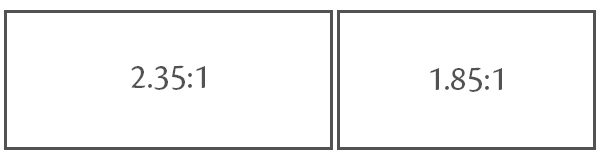

In [50]:
round(pd.crosstab(df['aspect_ratio'],columns = df['year'])/df.groupby('year').size(),2)

year,2007,2008,2009,2010,2011,2012,2013,2014,2015
aspect_ratio,,,,,,,,,
1.33,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
1.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
1.66,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
1.78,0.00,0.01,0.01,0.03,0.01,0.01,0.01,0.01,0.00
1.85,0.40,0.38,0.41,0.32,0.30,0.32,0.22,0.19,0.29
2.24,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
2.35,0.58,0.60,0.57,0.64,0.65,0.65,0.76,0.69,0.68
2.39,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.00
2.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00


#### We can see that the aspect ratio for 1.85 has dropped from 40% to about 30% (not linearly), and for aspect ratio 2.35(16:9), the ratio has increased from 60% to about 70% (not linearly).
##### It seems like there released year is not significant enough to explain the change.

#### As a result, I would use common group method to impute the missing values, and also transform other category into either 1.85 (normal) or 2.35 (wider)


### Handling Outliers



## Feature Engineering

### Profitable?
#### We can know the fact whether a movie is profitable by deducing budget from gross

In [24]:
df['make_money'] = 0
df.make_money.loc[df['profit']>0] = 1
df.head()

,Unnamed: 0,movieId,imdbId,tmdbId,youtubeId,title,color,director_name,num_critic_for_reviews,duration,...,full_link,views,dates,likes,dislikes,lens_mean,lens_median,lens_rate_counts,profit,make_money
0,2560,49910,463998,1646.0,MT0L1U-Rdj4,Freedom Writers (2007),Color,Richard LaGravenese,84.0,123.0,...,https://www.youtube.com/watch?v=MT0L1U-Rdj4,1164879.0,2007413.0,2230.0,69.0,3.675407,4.0,553,15581633.0,1
1,2568,50149,308353,5393.0,wHM6fNDKdu4,Happily N'Ever After (2007),Color,Paul Bolger,93.0,75.0,...,https://www.youtube.com/watch?v=wHM6fNDKdu4,199307.0,2009727.0,383.0,62.0,2.383721,2.5,129,-31480159.0,0
2,2569,50153,462229,14396.0,QDRlvUbA-s4,Code Name: The Cleaner (2007),Color,Les Mayfield,53.0,91.0,...,https://www.youtube.com/watch?v=QDRlvUbA-s4,228309.0,201018.0,177.0,11.0,2.515152,2.5,99,-11895931.0,0
3,2570,50158,775539,1931.0,hvLzhK7Vatw,Stomp the Yard (2007),Color,Sylvain White,86.0,109.0,...,https://www.youtube.com/watch?v=hvLzhK7Vatw,3941367.0,2006925.0,4648.0,265.0,2.897727,3.0,132,47356221.0,1
4,2572,50162,344854,9992.0,4jIF7IVddqA,Arthur and the Invisibles (2007),Color,Luc Besson,101.0,94.0,...,https://www.youtube.com/watch?v=4jIF7IVddqA,11422.0,201076.0,3.0,1.0,3.128272,3.0,191,-70868670.0,0


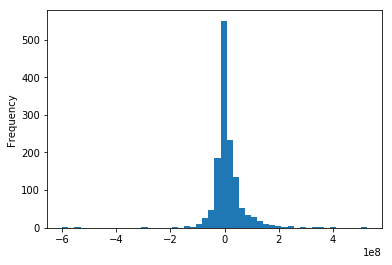

In [25]:
df['profit'].plot.hist(bins = 50)

In [27]:
df.make_money.sum()/df.make_money.count()

0.5029239766081871

##### Wanna make money in Film industry? Why not just go to Vegas? The probability that you can make money here is exactly same as playing with a dealer, it's 50/50.

#### How to compare properly between IMDB score and MovieLens ratings?
Here we used  0~1 Standardization to make these two rating comparable.

In [28]:
df['imdb_norm'] = (df.imdb_score - np.min(df.imdb_score))/ (np.max(df.imdb_score) - np.min(df.imdb_score))
df['movielens_norm'] = (df.lens_mean - np.min(df.lens_mean))/ (np.max(df.lens_mean) - np.min(df.lens_mean))

In [32]:
np.mean(abs(df['imdb_norm'] - df['movielens_norm']))

0.04575506697739433

In [ ]:
df['imdb_norm'].describe()

In [ ]:
df['movielens_norm'].describe()

In [ ]:
(df['imdb_norm'] - df['movielens_norm']).describe()

#### It seems that imdb rators is tougher than MovieLens rators. The score of imdb for each moview is about 2% lower on average than that of MovieLens.

In [ ]:
df['movielens_norm'].plot.hist()

In [ ]:
df['imdb_norm'].plot.hist()

#### Categorized Genres into Dummies Variables

In [ ]:
df.genres

In [ ]:
genres = np.concatenate(df.genres.str.split('|'))

In [ ]:
genres =  list(dict.fromkeys(genres))

In [ ]:
for gen in genres:
    df[gen] = 0
df.head()

In [ ]:
for gen in genres:
    df[gen] = df.apply(lambda x: int(gen in x.genres), axis=1)

In [ ]:
df.loc[0]

In [ ]:
df = df.drop('genres',axis = 1)

In [ ]:
df.groupby('content_rating').size()

#### What does each Rating means?
Let's check the definitino of content rating on Wikipedia
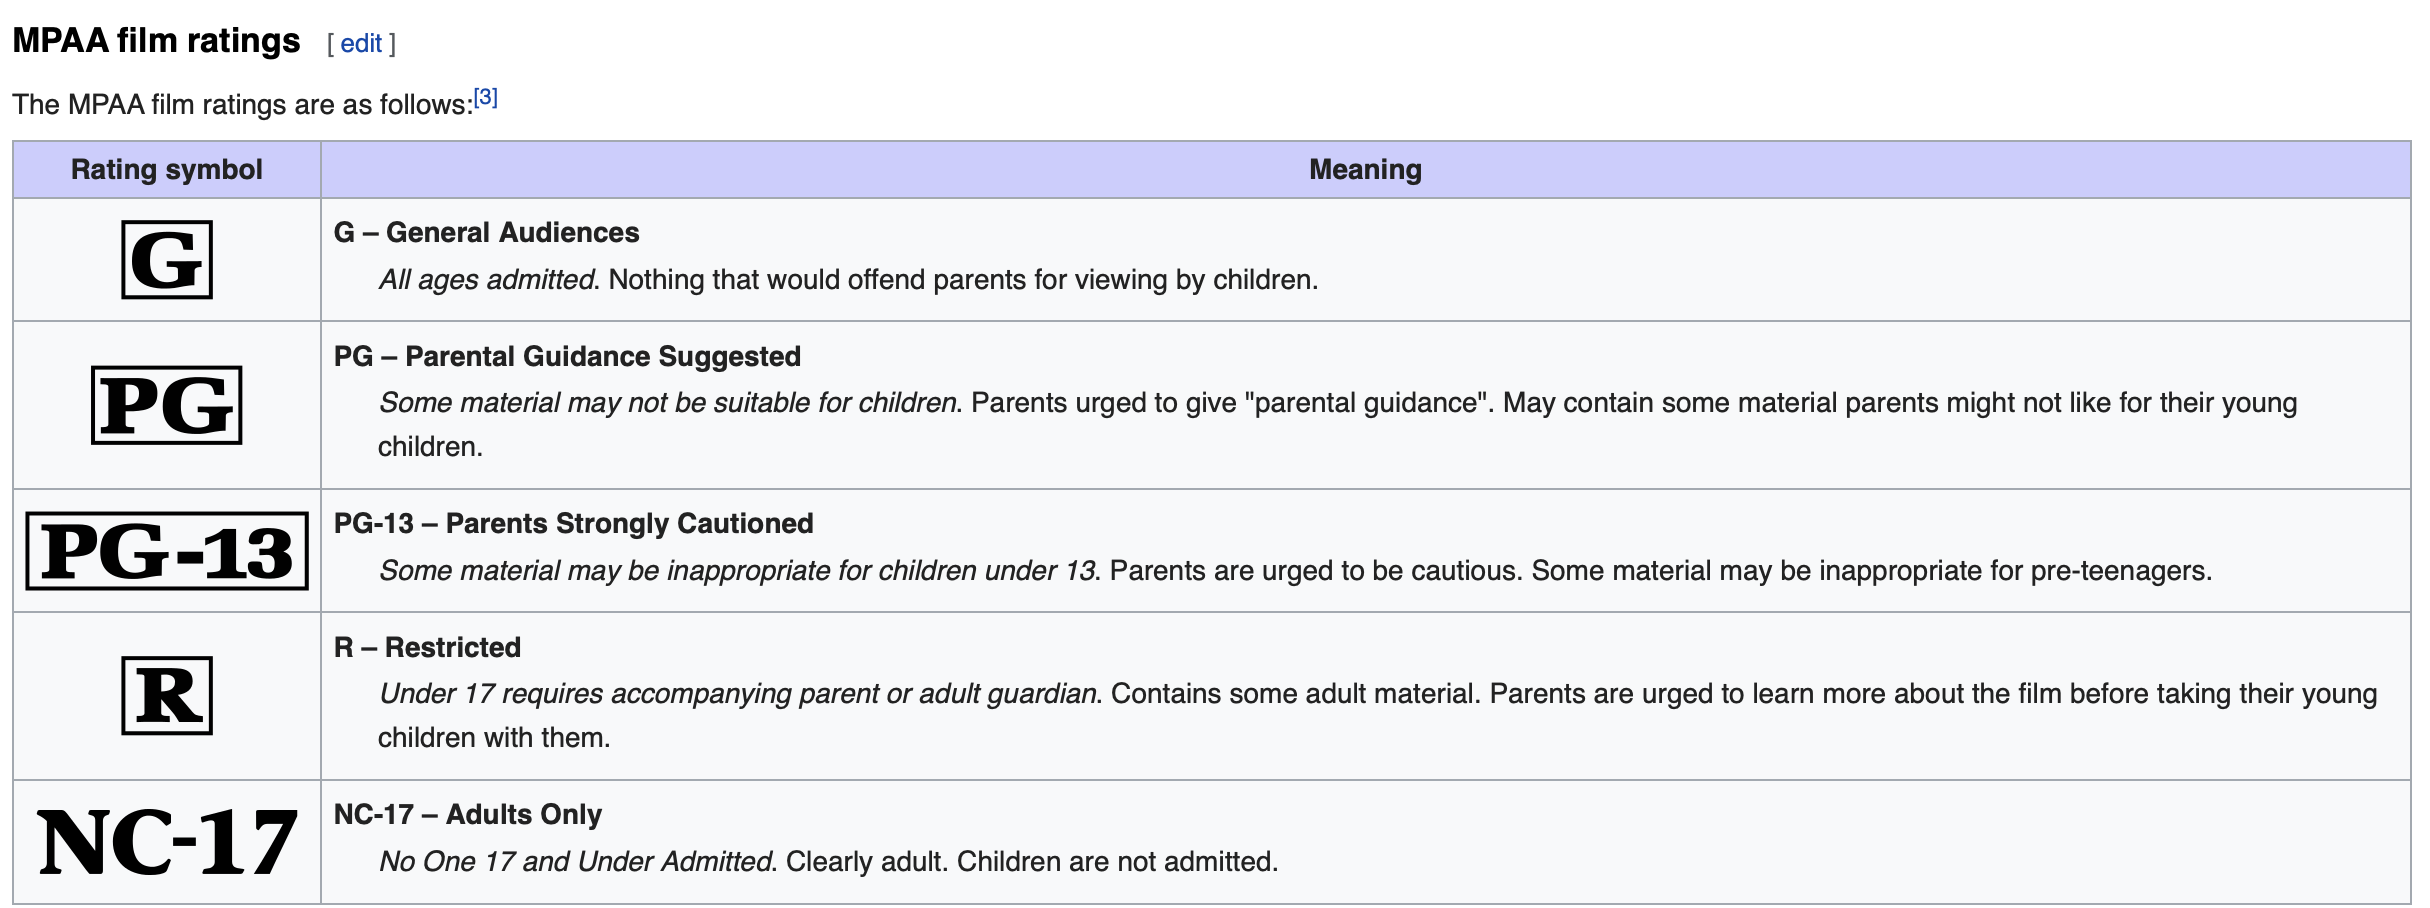
We can see there is an kind of order for these rating, from G – General Audiences to NC-17 – Adults Only, implying the movie is getting more retricted.

#### Imputation for unrated and other categories in the column 'content_rating'
Here we would impute those cell with mode = R

In [ ]:
df.content_rating[df.content_rating == 'Not Rated'] = 'R'
df.content_rating[df.content_rating == 'NC-17'] = 'R'
df.content_rating[df.content_rating == 'Unrated'] = 'R'

#### Country Origin
The column 'country' tell where the movie is produced, but there are too many countries with only few production. I decide to combine them with a new columns call 'Continent'. I don't want these become too complicated, so there will only 3 categories: North America (NA), Europe (EU) and Others (O).
- NA: Canada, USA
- EU: Belgium, Denmark, Finland, France, Germany, Hungary, Iceland, Ireland, Italy, Netherlands, Norway, Romania, Russia, Spain, UK
- O: Argentina, Australia, Brazil, China, Georgia, Hong Kong, India, Indonesia, Iran, Israel, Japan, Mexico, New Zealand, South Africa, South Korea, Thailand              

In [ ]:
df.groupby('country').size()

In [ ]:
df['continent'] =''

In [ ]:
df['continent'][(df.country == 'USA') | (df.country ==  'Canada') | (df.country ==  'Official site')] = 'NA'
df['continent'][(df.country == 'UK') | (df.country ==  'Belgium') | (df.country ==  'Denmark') | (df.country ==  'Finland') | (df.country ==  'France') | (df.country ==  'Germany')| (df.country ==  'Hungary')| (df.country ==  'Iceland')| (df.country ==  'Ireland')| (df.country ==  'Italy')| (df.country ==  'Netherlands')| (df.country ==  'Norway')| (df.country ==  'Romania') | (df.country ==  'Russia')| (df.country ==  'Spain') ] = 'EU'
df['continent'][df['continent']==''] = 'O'

In [ ]:
# Offical site is categorized as NA after further investigation.
df[df.country =='Official site']

In [ ]:
df.groupby('continent').size()

In [ ]:
df.columns

In [ ]:
df[,]describe()

### Feature Selection

There are many variables in this MovieLens-YouTube-IMDB merge dataset. I would take the following article from a NYU students and select some meaningful features from IMDB dataset.
The article: https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/

Some features he suggest are important are as follow:
- imdb_score
- director_facebook_likes
- duration
- actor_1_facebook_likes
- actor_2_facebook_likes
- actor_3_facebook_likes
- facenumber_in_poster
- budget   <br/>

Therefore, I would also use these variables in the following analysis.

In [ ]:
df.describe(include = ['O'])

In [ ]:
df.describe()

In [ ]:
df.lens_rate_counts.describe()

In [ ]:
dtype_select_c = ['object']
categorical_columns = df.select_dtypes(dtype_select_c).columns
categorical_columns

In [ ]:
dtype_select = ['int64','float64']
numeric_columns = df.select_dtypes(dtype_select).columns

In [ ]:
numeric_columns = numeric_columns.drop(['Unnamed: 0', 'movieId', 'imdbId', 'tmdbId','dates'])
numeric_columns

In [ ]:
for col in numeric_columns:
    print(col)
    plt.hist(df[col]) 
    plt.show()

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df[numeric_columns],hue = 'make_money', palette="Set1")
plt.show()

### Correlation Heat plot

In [ ]:
corr = np.corrcoef(df[numeric_columns])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)